In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('articles.csv')
data.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [4]:
main_data = data[:80]

#### Tokenization, Stemming, Lemmatization, Stopword removal, FeqDist

In [7]:
import nltk

In [9]:
common = nltk.corpus.stopwords.words('english')
custom = []
stop = np.hstack([common,custom])

In [37]:
docs = main_data['text']
docs = docs.str.lower()
docs = docs.str.replace("[',:,;,.]",'')
docs = docs.str.split()

In [10]:
words_all = []
words_cln = []
words_lst = []
for row in docs:
    row_word = [i for i in row if i not in stop]
    words_cln.append(row_word)
    words_lst.append(' '.join(row_word))
    words_all.extend(row_word)

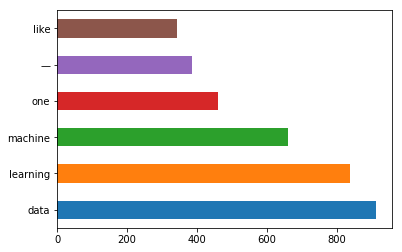

In [11]:
words_all = pd.Series(words_all)
words_all.value_counts().head(6).plot.barh()

In [12]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

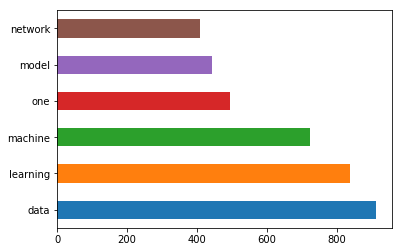

In [13]:
words_all = []
words_cln = []
words_lst = []
for row in docs:
    row_word = [lemm.lemmatize(i) for i in row if i not in stop]
    words_cln.append(row_word)
    words_lst.append(' '.join(row_word))
    words_all.extend(row_word)
words_all = pd.Series(words_all)
words_all.value_counts().head(6).plot.barh()

In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

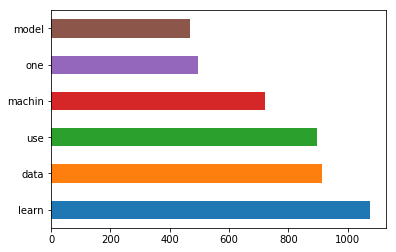

In [15]:
words_all = []
words_cln = []
words_lst = []
for row in docs:
    row_word = [stemmer.stem(i) for i in row if i not in stop]
    words_cln.append(row_word)
    words_lst.append(' '.join(row_word))
    words_all.extend(row_word)
words_all = pd.Series(words_all)
words_all.value_counts().head(6).plot.barh()

###### Tokenize try

In [16]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [80]:
tok_data = main_data['text'].str.lower()
tok_data = tok_data.str.replace("[^a-z]",'')

In [49]:
tok_data = tok_data.apply(nltk.word_tokenize)

In [50]:
tok_data.head(3)

0    [oh, how, the, headlines, blared, chatbots, we...
1    [if, you, ’, ve, ever, found, yourself, lookin...
2    [machine, learning, is, increasingly, moving, ...
Name: text, dtype: object

In [58]:
tok_data = main_data['text'].str.lower()
tok_data = tok_data.str.replace("[',:,;,.]",'')

tok_data = tok_data.apply(nltk.sent_tokenize)
tok_data.head(3)

0    [oh how the headlines blared\nchatbots were th...
1    [if you’ve ever found yourself looking up the ...
2    [machine learning is increasingly moving from ...
Name: text, dtype: object

#### POS tagging

In [71]:
main_data.columns = main_data.columns.str.strip()

In [72]:
com = ['DT', 'NN', 'VB', '...']

In [74]:
main_data.text.str.split().apply(lambda x : list(zip(x, com)))[:1]

0    [(Oh,, DT), (how, NN), (the, VB), (headlines, ...
Name: text, dtype: object